# Binäre Klassifikation - Bewertung

## 1 Daten aufbereiten
Eine wichtige und nicht ganz einfache Aufgabe ist es, die Daten, die verwendet werden aufzubereiten.
Daten können aus unterschiedlichen Quellen mit unterschiedlicher Qualität und mit unterschiedlichen Unsicherheiten kommen.
Daher müssen die Daten geprüft und bei Bedarf angepasst werden.
Hilfreich ist dabei sich die Daten anzusehen - tabellarisch, grafisch oder mit Kennzahlen.

Ein hilfreiches Werkzeug hierfür ist, neben `NumPy` und `Matplotlib`, insbesondere `Pandas`.
Hier wird die Arbeit mit `Pandas` nur angedeutet. 
Ziel ist es aktuelle Forschungsdaten zu habitablen Planeten aufzubereiten, so dass sie in folgenden Abschnitten verwendet werden können.
Die Daten werden als eine CSV-Datei eingelesen und später die Daten, die weiter verarbeitet werden,
wieder als eine CSV-Datei ausgegeben, die von NumPy direkt eingelesen werden kann. Somit sind dann nur noch numerische Werte enthalten. 

Import wichtiger Pakete, die verwendet werden.

In [1]:
# --- imports
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.patches as mpatches

from sklearn import metrics 
from tools_confmatrix import show_confusion_matrix_extended

### 1.1 Daten für habitable Planeten

Nachdem für eine kleine Menge von Planeten die Untersuchung auf habitable Planeten durchgeführt wurde,
wird nun die komplette Menge der derzeit verfügbaren Daten herangezogen. Auf der Webseite https://phl.upr.edu/hwc
des Planet Habitability Laboratory, an der University of Puerto Rico in Arecibo, 
sind Daten der aktuellen entdeckten (Exo-)planeten vorhanden. Die Daten wurden am 22.08.2024 exportiert.

Die Daten werden in ein `pandas`-Datenframe gespeichert.
Dort können auch nicht-numerische Daten eingetragen sein.

In [2]:
# --- read the data - complete
filename_inp = 'data\HabitablePlanets_complete.csv'
df_hpc = pd.read_csv (filename_inp, sep=',')

In der Tabelle sind viele Spalten enthalten, insgesamt 118. Mit dem nachfolgenden Befehle werden (einige) Spaltennamen angezeigt. 

In [3]:
df_hpc.columns

Index(['P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
       'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_MASS_LIMIT',
       'P_MASS_ORIGIN',
       ...
       'S_ABIO_ZONE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON',
       'P_TYPE_TEMP', 'P_HABITABLE', 'P_ESI', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object', length=118)

Nachfolgende die ersten Zeilen der Tabelle, jedenfalls ein Ausschnitt davon.

In [4]:
df_hpc.head ()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


### 1.3 Spalten auswählen und aufbereiten
Neben numerischen Werten gibt es auch Texte, also nicht-numerische Werte, oder Datenzellen, in die kein Wert eingetragen ist (`NaN` = Not a Number).

Für die weiteren Untersuchungen werden nur die Spalten
- `S_MASS` (Masse des Elternsterns in Sonnenmassen), 
- `P_PERIOD` (Umlaufzeit des Planeten in Tagen),
- `P_DISTANCE` (Entfernung des Planeten zum Elternstern in Astronomischen Einheiten (AU)) und
- `P_HABITABLE` (Kennzeichen, ob habitable (1 optimistische Einschätzung, 2 konservative Einschätzung)) oder nicht habitable (0).

selektiert.
Diese Spalten wurden bereits für das einfache Einführungsbeispiel bei den Algorithmen DT (Entscheidungsbaum, *Decision Tree*) 
und kNN (k-Nächste Nachbarn, *k-Nearest Neighbours*) verwendet.

Nach der Auswahl der für die Untersuchung benötigten Spalten werden diejenigen Zeilen gelöscht, in denen Daten fehlen.
Es werden also diejenigen Zeilen gelöscht, in denen in den vier wichtigen Spalten Daten fehlen, 
also ein `NaN` eingetragen ist. 

Es gibt auch andere Möglichkeiten mit fehlenden Daten umzugehen.
Beispielsweise können fehlende Daten ergänzt werden, etwa durch den Mittelwert der anderen Daten. 
Dieses Verfahren wird *imputing* genannt, jedoch hier nicht betrachtet.

In [5]:
# --- select the columns for the analysis
df_selected_columns \
    = df_hpc [['S_MASS', 'P_PERIOD', 'P_DISTANCE', 'P_HABITABLE']]
print (f"number of exoplanets in the raw list : " \
       + f"{df_selected_columns.shape [0]}  (still with NaN-values)")

# --- remove the rows with NaN-values
df_removed_rows = df_selected_columns.dropna (axis = 0)
print (f"number of exoplanets in the     list : " \
       + f"{df_removed_rows.shape [0]}  (without any NaN-values)")

number of exoplanets in the raw list : 5599  (still with NaN-values)
number of exoplanets in the     list : 5350  (without any NaN-values)


Nun wird untersucht, wie viele habitablen Planeten in der Liste überhaupt sind.

In [6]:
print (df_removed_rows.groupby ('P_HABITABLE').count())

             S_MASS  P_PERIOD  P_DISTANCE
P_HABITABLE                              
0              5280      5280        5280
1                29        29          29
2                41        41          41


Für die Kennzeichenung von habitablen Planeten werden drei verschiedene Kennzeichen verwendet werden
- 0 für nicht habitabel
- 1 für habitabel nach einer optimistischen Einschätzung und
- 2 für habitabel nach einer konservativen Einschätzung.

Es wird in der Spalte `P_HABITABLE` jede 2 durch eine 1 ersetzt. Eine genauere Differenzierung ist für die weitere Untersuchung
nicht notwenig. Die Anzahl der habitablen Planenten ist klein genug!

In [7]:
# --- replace value 2 to 1 in column P_HABITABLE
df_removed_rows.loc [df_removed_rows.P_HABITABLE == 2, 'P_HABITABLE'] = 1
df_hp = df_removed_rows
print (df_hp.groupby ('P_HABITABLE').count())

             S_MASS  P_PERIOD  P_DISTANCE
P_HABITABLE                              
0              5280      5280        5280
1                70        70          70


Damit ergibt sich ein binäres Klassifikationsproblem:
- Anhand der Eigenschaften `S_MASS`, `P_PERIOD` und `P_DISTANCE` wird vorhergesagt,
  ob ein Planet habitable ist oder nicht.

### 1.4 Daten betrachten
Es werden nun einige statistische Kennzahlen der beschreibende Statistik ausgegeben.
AUch dies wird noch mit Hilfe von `pandas` durchgeführt.

In [8]:
df_hp.describe ()

,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
count,5350.000000,5.350000e+03,5350.000000,5350.000000
mean,0.967725,7.994082e+04,2.298436,0.013084
std,0.394993,5.498596e+06,103.218178,0.113646
min,0.010000,9.070629e-02,0.004408,0.000000
25%,0.810000,4.465382e+00,0.051900,0.000000
50%,0.950000,1.156951e+01,0.096550,0.000000
75%,1.100000,4.150555e+01,0.232000,0.000000
max,10.940000,4.020000e+08,7506.000000,1.000000


Es ist zu erkennen, dass es bei den Daten Ausreißer gibt. Es gibt extreme Werte (`max`), die weit vom Mittelwert (`mean`) oder dem Median (`50%`) entfernt sind.
- Bei der Eigenschaft `S_MASS` ist es nicht so extrem, da der Mittelwert und der Median nicht so weit auseinander sind. 
  Auch die Standardabweichung ist von der Größenordnung nicht so extrem.
- Bei den Eigenschaften `P_PERIOD` und `P_DISTANCE` verzerren Ausreißer die Werte für Mittelwert und Standardabweichung sehr.
  Dies muss berücksichtigt werden, wenn das ML-Modell empfindlich auf Ausreißer reagiert (Beispiel: `kNN`)

### Einschub: Ausreißer mit Hilfe eines Histogramms betrachten
Dass es Ausreißer gibt kann auch mit Hilfe eines Histogramms dargestellt werden. Dies wird am Beispiel `S_MASS` gezeigt.

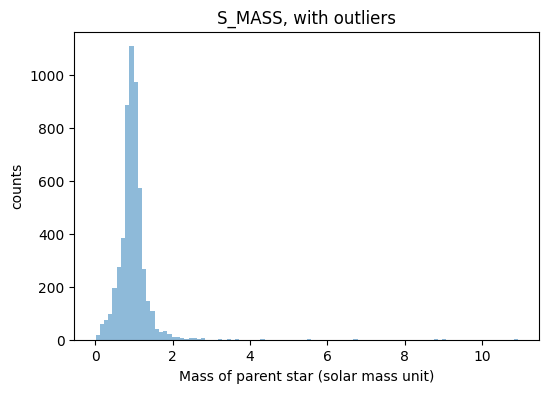

In [9]:
# --- plot histogramm for S_MASS
data_S_MASS = df_hp ['S_MASS'] 
plt.figure(figsize=(6,4))
plt.hist (data_S_MASS, bins = 100, alpha = 0.5)
plt.title ("S_MASS, with outliers")
plt.xlabel ("Mass of parent star (solar mass unit)")
plt.ylabel ("counts")
plt.show ()

Eine Möglichkeit Ausreißer zu klassifizieren ist die Festlegung, dass ein Ausreißer einen 
Abstand vom Mittelwert (`mean`) von mehr als das fünffache der Standardabweichung (`std`) hat.

In [10]:
# --- calculate z-value of the values 
# (distance of the value from the mean in units of std)
data_S_MASS_new = data_S_MASS [(np.abs (stats.zscore (data_S_MASS)) < 5)] 
print ("number of values in S_MASS with    outliners: ", data_S_MASS.size)
print ("number of values in S_MASS without outliners: ", data_S_MASS_new.size)

number of values in S_MASS with    outliners:  5350
number of values in S_MASS without outliners:  5340


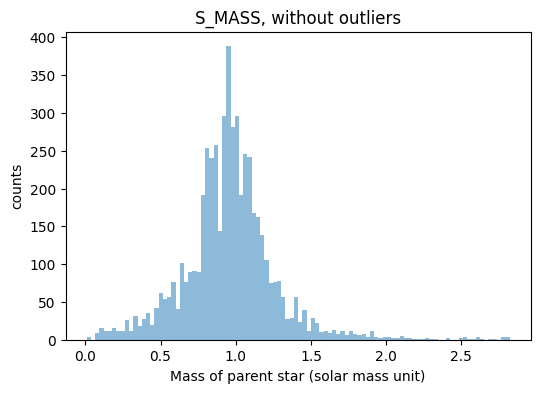

In [11]:
# --- plot histogram of S_MASS, without outliers
plt.figure(figsize=(6,4))
plt.hist(data_S_MASS_new, bins = 100, alpha = 0.5)
plt.title ("S_MASS, without outliers")
plt.xlabel ("Mass of parent star (solar mass unit)")
plt.ylabel ("counts")
plt.show ()

Für die beiden anderen Input-Daten sieht die Verbesserung des Histogramms leider nicht so gut aus. 
Da sind die Standardabweichungen durch extreme Ausreißer sehr hoch!

**Aufgabe**: Für die beiden anderen Merkmale (`P_PERIOD` und `P_DISTANCE`) ebenso jeweils ein Histogramm plotten,
sowohl mit den Ausreißern, als auch ohne Ausreißer. Wie können hier die Ausreißer sinnvollerweise definiert werden?
Kann dazu der Median und der Interquartilsabstand hilfreich sein?

### 1.4 Daten betrachten (Fortsetzung)
Die Daten wurden auf verschiedene Weise tabellarisch betrachtet. Nun wird eine grafische Darstellung erstellt.
Dafür werden nur zwei Eigenschaften ausgewählt. Es sind dieselben, die auch im Einführungsbeispiel 
verwendet wurden: `S_MASS`und `P_PERIOD`. Der Code wurde von [Acq2023] entnommen und leicht angepasst.
Wegen Ausreißern wurde der Bereich der Daten, welcher geplottet wird, begrenzt. 

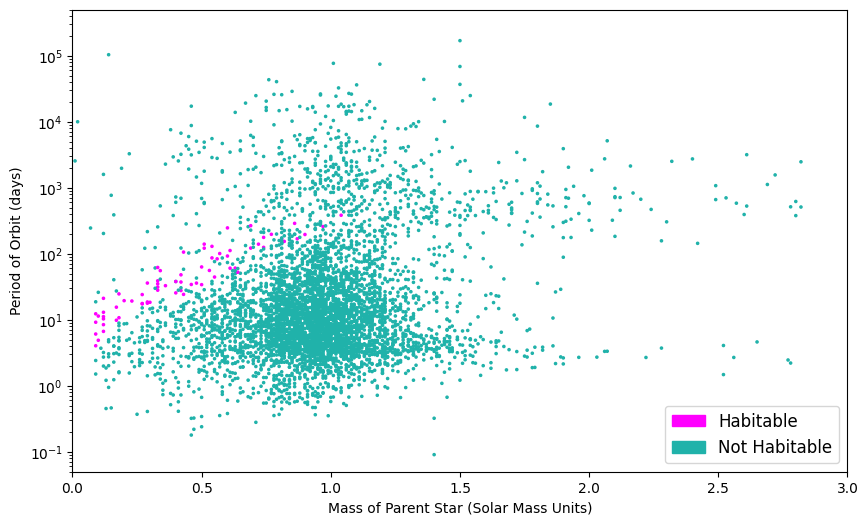

In [12]:
# --- plot the planets 
plt.figure(figsize=(10,6))

C_NOT = '#20B2AA' # color not habitable
C_HAB = '#FF00FF' # color habitable
cmap = matplotlib.colors.LinearSegmentedColormap.from_list \
    ("cmap", [C_NOT, C_HAB])

a = plt.scatter(df_hp ['S_MASS'], df_hp ['P_PERIOD'], marker = '.',\
            c = df_hp ['P_HABITABLE'], s = 10, cmap=cmap, label = 'Test')
plt.legend()

plt.yscale('log')
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

plt.xlim ([0.0, 3.0])
plt.ylim ([5*1e-2, 5*1e5])
bluepatch = mpatches.Patch (color=C_NOT, label='Not Habitable')
magentapatch = mpatches.Patch (color=C_HAB, label='Habitable')

ax = plt.gca()
leg = ax.get_legend()

plt.legend(handles=[magentapatch, bluepatch],\
           loc = 'lower right', fontsize = 12)
plt.show ()

Der Grafik macht deutlich, dass die habitablen Planeten sehr dünn gesäht sind. Betrachtet man unser Sonnensystem, dann ist das nicht verwunderlich!

### 1.5 Daten als NumPy-Array in eine CSV-Datei schreiben
Die Daten sind nun aufbereitet und betrachtet.
Sie werden nun als NumPy-Array in eine CSV-Datei geschrieben. 
Dies erfolgt jedoch mit `pandas`, welches das Datenframe als CSV-Datei speichert.
Damit kann die CSV-Datei in nachfolgenden Einheiten direkt von NumPy eingelesen werden,
ohne dass noch eine große Aufbereitung durchgeführt werden muss.
Eventuell sind Ausreißer zu beachten und speziell zu behandeln!


In [13]:
# --- write data to csv-file
filename_out = 'data\HabitablePlanets_work.csv'
pd.DataFrame (df_hp).to_csv (filename_out)

### 1.6 Abschließende Bemerkungen zur Datenaufbereitung
Die Aufbereitung von Daten wurde hier nur kurz angerissen.
Die Aufgabe der Aufbereitung der Daten ist keine einfache Aufgabe. 
Sie wird hier jedoch nicht genauer vertief. 
Es gibt technische Herausforderungen (dabei kann `pandas` helfen, siehe dazu beispielsweise [Van2024]),
jedoch auch fachlichen Herausforderungen. 
Für die fachlichen Herausforderungen ist es wichtig, die Daten zu verstehen.
Daher benötigt man dazu einen tiefen fachlichen Hintergrund.

## 2 Bewertung
Im Kapitel Binäre Klassifikation - Erste Modelle wurde bei den verschiedenen Modellen betrachtet, wie viele Testinstanzen korrekt vorhergesagt wurden.
Hier wird nun genauer und detaillierter untersucht, welche weiteren Kennzahlen es für die Bewertung gibt.
Damit können dann verschiedene Modelle verglichen werden.

### 2.1 Daten für habitable Planeten

Nachdem für eine kleine Menge von Planeten die Untersuchung auf habitable Planeten durchgeführt wurde,
wird nun die komplette Menge der derzeit verfügbaren Daten herangezogen. 
DIe Daten wurden im vorherigen Abschnit als `numpy`-Array aufbereitet und gesichert.
Die aufbereiteten Daten stehen als `numpy`-Array zur Verfügung.

In der CSV-Datei sind fünf Spalten enthalten:
- die erste Spalte ist nur eine Durchnumerierung der Daten,
- `S_MASS` (Masse des Elternsterns in Sonnenmassen), 
- `P_PERIOD` (Umlaufzeit des Planeten in Tagen),
- `P_DISTANCE` (Entfernung des Planeten zum Elternstern in Astronomischen Einheiten (AU)) und
- `P_HABITABLE` (Kennzeichen, ob habitabel (1 habitabel, 0 nicht habitabel)).

In [14]:
# --- read the data - complete
filename = 'data\HabitablePlanets_work.csv'
hwc = np.genfromtxt (filename, delimiter=',', \
                     usecols = (1, 2, 3, 4), skip_header = 1)
print (f"number of               exoplanets in the list : {hwc.shape [0]:5d}")

# -- split in features and label
hwc_features = hwc [:,0:3]
hwc_label = hwc[:,3]
unique, counts = np.unique (hwc_label, return_counts = True)
print (f"number of not habitable exoplanets in the list : {counts [0]:5d}")
print (f"number of     habitable exoplanets in the list : {counts [1]:5d}")

number of               exoplanets in the list :  5350
number of not habitable exoplanets in the list :  5280
number of     habitable exoplanets in the list :    70


### 2.2 Genauigkeit, Präzision und Trefferquote
Die **Genauigkeit** (*accuracy*) wurde bereits in vorherigen Untersuchungen berechnet.
Es ist der Quotient zwischen korrekten Vorhersagen und allen Elementen.
Beim Beispiel der habitablen Planeten gibt es 70 habitable Planeten von insgesamt 5350 untersuchten Planeten.
Wenn automatisch jeder Planet als nicht habitable vorhergesagt wird (*faule Zuordnung*), 
dann ist die Genauigkeit bei $(5350 - 70) / 5350 = 0.987$, also bei $98.7 \%$.
Ein scheinbar hervorragender Wert. Dieser Wert ergibt sich jedoch, da es fast 
keine habitablen Planeten gibt. Daher ist bei dieser extrem unausgeglichenen Menge 
die Aussagekraft der Kennzahl Genauigkeit sehr gering. Es bedarf weiterer Kennzahlen.

Bei einer binären Klassifikation gibt es für jedes Element zwei mögliche Klassen
und zwei mögliche Vorhersagen.
Die beiden Klassen werden mit positiv (**P**) und negativ (**N**) bezeichnet.
Die positive Klasse ist die Basis- oder Grundklasse (*ground truth*).
Im Beispiel der habitablen Planeten stehe **P** für habitabel und **N** für nicht habitabel.
Die Vorhersage für die Elemente können wahr (True, **T**) sein, die Klasse wurde richtig vorhergesagt, 
oder falsch (False, **F**) sein, die Klasse wurde nicht richtig vorhergesagt. 
Daher gibt es vier Kennzahlen:
- **TP** (true positive): die Anzahl der Elemente, bei denen das positive Merkmal korrekt vorhergesagt wurde
  (korrekt klassifiziert als positiv),
- **TN** (true negative): die Anzahl der Elemente, bei denen das negative Merkmal korrekt vorhergesagt wurde
  (korrekt klassifiziert als negativ),
- **FP** (false positive): die Anzahl der Elemente, die falsch als Positiv vorhergesagt wurden
  (nicht korrekt klassifiziert als positiv) und
- **FN** (false negative): die Anzahl der Elemente, die falsch als Negativ vorhergesagt wurden
  (nicht korrekt klassifiziert als negativ).

Somit betrachtet der zweite Buchstabe (P / N) die Klassifikation durch das Modell. 
Der erste Buchstabe (T / F) besagt, ob die getroffene Klassifizierung korrekt (T) oder nicht korrekt (F) ist.

Die **Genauigkeit** (*accuracy*) ist damit definiert durch
$$ accuracy = \frac{TN + TP}{TP + TN + FP + FN} .$$
Es werden zwei weitere wichtige Kennzahlen definiert.

Die **Präzision** (*precision*) 
$$ precision = \frac{TP}{TP + FP} $$
ist der Anteil der Elemente in der positiven Klasse, die korrekt vorhergesagt wurden.
Die **Trefferquote** (*recall*) 
$$ recall = \frac{TP}{TP + FN} $$
ist der Anteil der korrekt vorhergesagten Elemente in der Menge, die der positiven Klasse angehören.

Bei dem obigen Beispiel der habitablen Planeten mit der *faulen Zuordnung* ist 
die Präzision undefiniert, da $TP + FP = 0$ ist. Die Trefferquote ist $0 = 0 / (0 + 70)$.
Das zeigt, dass die *faule Zuordnung* zwar eine hohe Genauigkeit hat, aber nicht brauchbar ist.

Wünschenswert ist ein Modell, das eine sehr hohe Präzision und eine sehr hohe Trefferquote hat.
Am Besten jeweils 1. Dann sind **FP** und **FN** jeweils Null, 
da alle Elemente korrekt vorhergesagt werden. Damit ergibt sich für die Genauigkeit der Wert 1.
 
**Hinweis**: Präzision und Trefferquote sind nicht symmetrisch. 
Werden die positive und negative Klasse getauscht, 
dann ergeben sich (mit den bisherigen Bezeichnungen) 
$precision = TN / (TN + FN) = 1$ und $recall = TN / (TN + FP) = 0.987$.
Dies sind komplett andere Werte. 
Daher ist es wichtig darauf zu achten, welches die positive Klasse ist!

### 2.3 Anwendung der Modelle DT 
In vorherigen Kapitel Binäre Klassifikation - Erste Modelle wurde das Modell Entscheidungsbaum (Decision Tree) trainiert und gespeichert.
Genauer wurden drei verschiedene Modelle trainiert und gespeichert.
Das erste trainierte Modell wird nun eingelesen und dann auf die gesamte Menge der Planenten angewendet.

In [15]:
import pickle

# --- read trained model
filename_DT1 = "DT1-habitable.pkl"
with open (filename_DT1, "rb") as f:
    DT1_model = pickle.load (f)

Ein Training muss nicht mehr stattfinden, das wurde vorher erledigt.
Jetzt wird das Modell nur noch angewendet.

Die Ergebnisse, also die Zahlen für **TP**, **TN**, **FP** und **FN** werden mit einer sogenannten **Wahrheitsmatrix** (*confusion matrix*).
DIes ergibt eine gute Übersicht.
Weiterhin werden die Werte Genauigkeit, Präzision und Trefferquote ausgegeben.
Es werden noch weitere Werte ausgegeben, die erst später erläutert werden.

Dies wird als eine Prozedur realisiert, da die Gesamtmenge auch mit den anderen trainierten Modelle getestet wird.
Das Modul `sklearn`bietet auch die Ausgabe einer Wahrheitsmatrix (*confusion matrix*), sogar als Grafik.
Dies wird jedoch im erstmals nicht verwendet

Erstes Modell anwenden

In [16]:
# --- predict
y_pred1 = DT1_model.predict (hwc_features)
labels = ["non hab", "hab"]
show_confusion_matrix_extended (hwc_label, y_pred1, labels = labels)

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   4257 | FP=   1023 |
  true label  -----------+------------+------------+
              hab        | FN=      6 | TP=     64 |
-------------------------+------------+------------+

    F1-score    = 0.1106
    accuracy    = 0.8077
    precision   = 0.0589    purity
    recall      = 0.9143    sensitivity / efficiency
    FP-rate     = 0.1938    alpha-error
    TP-rate     = 0.9143    1 - beta-error


Das positive Label ist 'habitable'. 
Die Genauigkeit ist $(64 + 4257) / (64 + 6 + 4257 + 1023) = 0.808$.
Die Präzision ist $64 / (64 + 1023) = 0.059$, denn viele nicht habitable Planeten wurden als habitable eingestuft.
Die Trefferquote ist $64 / (64 + 6) = 0.914$, denn von den 70 habitablen Planeten wurden 64 korrekt klassifiziert. 

Jetzt wird das zweite Modell eingelesen und angewendet.

In [17]:
# --- read trained model
filename_DT2 = "DT2-habitable.pkl"
with open (filename_DT2, "rb") as f:
    DT2_model = pickle.load (f)
    
# --- predict
y_pred2 = DT2_model.predict (hwc_features)
show_confusion_matrix_extended (hwc_label, y_pred2, labels = labels)

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   4706 | FP=    574 |
  true label  -----------+------------+------------+
              hab        | FN=     25 | TP=     45 |
-------------------------+------------+------------+

    F1-score    = 0.1306
    accuracy    = 0.8880
    precision   = 0.0727    purity
    recall      = 0.6429    sensitivity / efficiency
    FP-rate     = 0.1087    alpha-error
    TP-rate     = 0.6429    1 - beta-error


Die Genauigkeit und die Präzision sind etwas besser, wobei die Präzision nicht gut ist.
Die Trefferquote ist geringer.

Jetzt wird das dritte Modell eingelesen und angewendet.

In [18]:
# --- read trained model
filename_DT3 = "DT3-habitable.pkl"
with open (filename_DT3, "rb") as f:
    DT3_model = pickle.load (f)

# --- predict
y_pred3 = DT3_model.predict (hwc_features)
show_confusion_matrix_extended (hwc_label, y_pred3, labels = labels)

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   5021 | FP=    259 |
  true label  -----------+------------+------------+
              hab        | FN=     20 | TP=     50 |
-------------------------+------------+------------+

    F1-score    = 0.2639
    accuracy    = 0.9479
    precision   = 0.1618    purity
    recall      = 0.7143    sensitivity / efficiency
    FP-rate     = 0.0491    alpha-error
    TP-rate     = 0.7143    1 - beta-error


Dieses dritte Modell ist bei der Genauigkeit und der Präzision besser als die anderen, 
jedoch in der Trefferquote schlechter als das erste Modell.
Die Präzision ist jedoch weiterhin gering.

Aber alle drei Modelle haben eine sehr, sehr kleine Trainingsmenge.

### 2.4 Training mit einer größeren Trainingsmenge
Jetzt wird eine größere Trainingsmenge generiert.
Die komplette Menge der Planeten wird als Lernmenge betrachtet.
Die Aufteilung in Trainings- und Testmenge wird zufällig bestimmt.
Wichtig ist dabei, dass auch habitable Planeten in die Trainingsmenge kommen, 
denn ansonsten wird alles als nicht habitabel klassifiziert.

In [19]:
from sklearn.model_selection import train_test_split

# --- split in training set / test set
X_train, X_test, y_train, y_test \
    = train_test_split(hwc_features, hwc_label, random_state=2024)
print (f"Elements in the training set   : {X_train.shape [0]:5d}")
unique, counts = np.unique (y_train, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")
print (f"Elements in the test set       : {X_test.shape [0]:5d}")
unique, counts = np.unique (y_test, return_counts = True)
print (f"  thereof habitable exoplanets : {counts [1]:5d}")

Elements in the training set   :  4012
  thereof habitable exoplanets :    49
Elements in the test set       :  1338
  thereof habitable exoplanets :    21


Jetzt wird wieder ein Entscheidungsbaum erstellt, so wie es schon mit der kleinen Menge durchgeführt wurde.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# --- define model
DT_model = DecisionTreeClassifier (random_state=2024)
print (DT_model)

# --- fit (train)
DT_model.fit (X_train, y_train)

DecisionTreeClassifier(random_state=2024)


DecisionTreeClassifier(random_state=2024)

Die grafische Darstellung des Entscheidungsbaumes ist etwas unübersichtlich, 
da tief (15 Ebenen) und verzweigt.

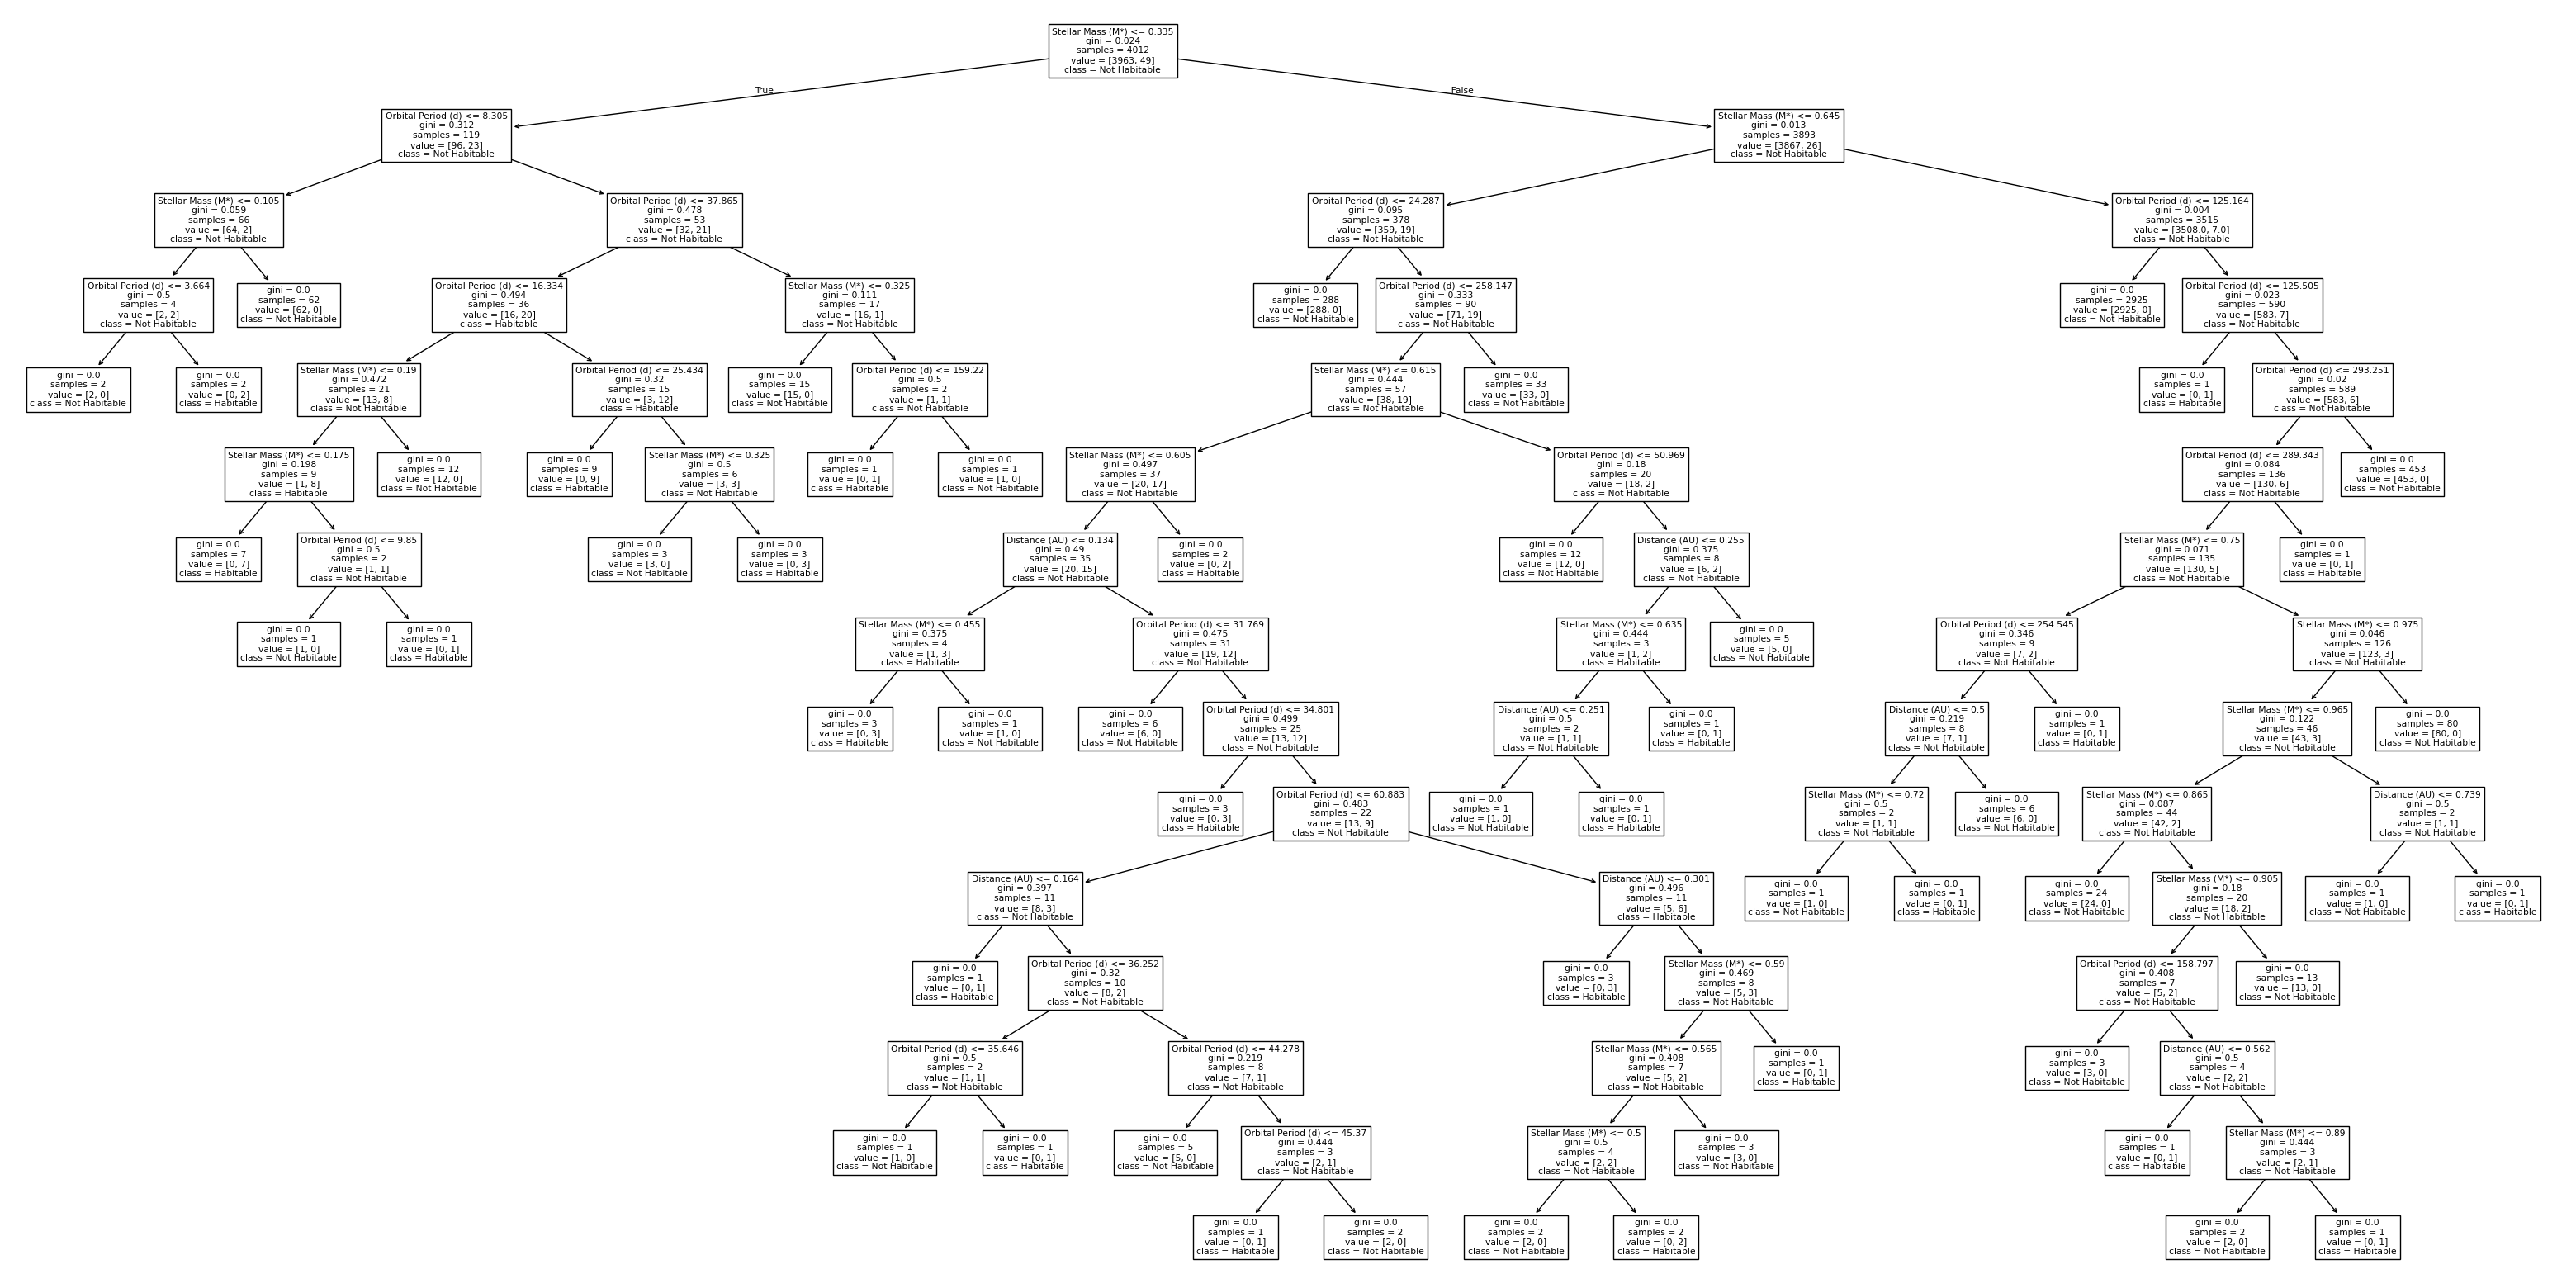

In [21]:
from sklearn import tree
# --- visualize decision tree
plt.figure (figsize=(40,20))  
tree.plot_tree (DT_model, feature_names = ['Stellar Mass (M*)', \
    'Orbital Period (d)', 'Distance (AU)'], \
    class_names = ['Not Habitable','Habitable'])
plt.show()

Dieses Model hat für die Trainingsmenge eine 100% Genauigkeit,
denn für den Entscheidungsbaum wurde keine Begrenzung bezüglich der Tiefe vorgegeben.
Damit wurde so lange die Bereiche geteilt, bis alle Bereiche rein sind.
Damit wird die Genauigkeit auf der Traningsmenge 100% sein.
Aber wie hoch ist die Genauigkeit bei der Testmenge?

In [22]:
# --- predict
y_pred_train = DT_model.predict (X_train)
print (f"  accuracy (training set) : " \
       + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
y_pred = DT_model.predict (X_test)
print (f"  accuracy (test set)     : " \
       + f"{metrics.accuracy_score (y_test, y_pred):5.3f}")

  accuracy (training set) : 1.000
  accuracy (test set)     : 0.987


Die Genauigkeit bei der Trainingsmenge ist, wie erwartet bei 100%.
Die Genauigkeit in der Testmenge ist bei 98,7 %, also etwa genau so gut wie bei der Strategie, alles als nicht habitable zu klassifizieren.
Wie sehen die anderen Kennzahlen aus? Dazu die Wahrheitsmatrix.

In [23]:
show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   1312 | FP=      5 |
  true label  -----------+------------+------------+
              hab        | FN=     12 | TP=      9 |
-------------------------+------------+------------+

    F1-score    = 0.5143
    accuracy    = 0.9873
    precision   = 0.6429    purity
    recall      = 0.4286    sensitivity / efficiency
    FP-rate     = 0.0038    alpha-error
    TP-rate     = 0.4286    1 - beta-error


Die Erebnisse sind nicht so gut.

Wie schon vorher gesagt und gezeigt wurde, hängt das Ergebnis des Trainings stark von der Auswahl der Trainingsmenge ab.
Kann dies variabler gesteuert werden, dass es verschiedene Durchläufe gibt, bei denen sich die Trainingsmenge ändert
und am Ende ein geeignetes (das beste) Modell ausgewählt wird?
Dazu später mehr.

### 2.5 ROC und AUC
Bei der binären Klassifikation ist das Ergebnis der Klassifikation ein Wert,
der ohne Beschränkung der Allgemeinheit als $1$ / $Positiv$ und $0$ / 
$Negativ$ bezeichnet wird. 
Manchmal erfolgt auch die Zuordnung $1$ und $-1$.
Oftmals ist die Entscheidung, welche Klasse gewählt 
wird nur eine Aussage mit einer bestimmten Wahrscheinlichkeit. Es sei $P 
(Class = Positiv) = p$ die Wahrscheinlichkeit, dass die Klasse $Positiv$ 
erkannt wird. Für die Entscheidung, dass die Klasse $Positiv$ gewählt wird, 
wird ein **Schwellwert** (*threshold*) $t$ ($0.0 \leq t \leq 1.0$) 
bestimmt. Ist $p \geq t$, dann wird die Klasse $Positiv$ festgelegt, ansonsten 
die Klasse $Negativ$. In der Regel ist der Schwellwert $t = 0.5$.

Wie verändern sich die Kennwerte, insbesondere $TP$, $TN$, $FP$ und $FN$,
wenn der Schwellwert verändert wird? Es sei $P$ die positive Klasse 
($Class = Positiv$) und $N$ die negative Klasse ($Class = Negativ$)

Wenn der Schwellwert kleiner als $0.5$ ist, dann wird die Klasse $P$ öfters 
festgelegt. Auch einige $P$-Objekte, die bisher nicht als $P$-Objekte erkannt 
wurden, werden jetzt erkannt. Das bedeutet, dass $TP$ ansteigt und $FN$ sinkt. 
Aber auch einige $N$-Objekte, die bisher richtig klassifiziert wurden, werden 
als $P$-Objekte erkannt. Damit steigt $FN$.
Im Extremfall, wenn der Schwellwert bei $0.0$ liegt, wird alles 
als positiv klassifiziert. 

Wenn der Schwellwert größer als $0.5$ ist, dann wird die Klasse $P$ seltener 
festgelegt. Auch einige $P$-Objekte, die bisher als $P$-Objekte erkannt wurden, 
werden jetzt nicht mehr erkannt. Das bedeutet, dass $TP$ sinkt und $FN$ steigt. 
Aber auch einige $N$-Objekte, die  bisher falsch als $P$-Objekte klassifiziert 
wurden, werden jetzt als $N$-Objekte richtig klassifiziert. Damit sinkt $FN$.
Im Extremfall, wenn der Schwellwert bei $1.0$ liegt, wird alles wird alles
als negativ klassifiziert. 

Veränderungen am Schwellwert verändern somit die Kennwerte $FP$ und $FN$.
Dies hat Auswirkungen auf die Präzision und die Trefferquote.
Wird der Schwellwert kleiner, dann geht die Präzision gegen $0.0$, die
Trefferquote gegen $1.0$.
Wird der Schwellwert größer, dann geht die Präzision gegen $1.0$, die
Trefferquote gegen $0.0$.

Nur eine Metrik (Genauigkeit, Präzision oder Trefferquote) zu verwenden
ist nicht ausreichend. Daher werden neue Kennzahlen eingeführt, wie dies
beispielsweise bei Tom Fawcett [Faw2006] dargestellt ist.

Die **Wahr-Positiv-Rate** (*true positive rate*) oder kurz
$TP-Rate$,
\begin{align*}
    TPR = \frac {TP} {TP + FN} 
\end{align*}
ist der Anteil der korrekt als $P$-Objekt klassifizierten Objekte unter 
allen $P$-Objekten, also die Trefferquote.

Die **Falsch-Positiv-Rate** (*false positive rate*) oder kurz
$FP-Rate$
\begin{align*}
    FPR = \frac {FP} {FP + TN} 
\end{align*}
ist der Anteil der falsch als $P$-Objekt klassifizierten $N$-Objekte unter 
allen $N$-Objekten.

In der Statistik werden $TPR$, also die Trefferquote, als 
**Sensitivität** (*sensitivity*) und $ 1 - FPR$ als
**Spezifität** (*specificity*) bezeichnet.

Es wird nun die Funktion $TPR (FPR)$ gebildet, also die Wahr-Positiv-Rate
in Abhängigkeit von der Falsch-Positive-Rate gebildet. Der 
Definitionsbereich ist $[0.0, 1.0]$, ebenso der Wertebereich. Die Funktion
verläuft vom Punkt $(0,0)$ zum Punkt $(1,1)$. 
Die Funktion ist monoton wachsend. Sie heißt
**Operationscharakteristik** (*receiver operating characterisic 
curve*), kurz $ROC$-Kurve.

<img src="ExampleROCcurve.png" style="zoom:60%;" />

Ideal ist, wenn die $FR-Rate = 0$ und gleichzeitig die $TP-Rate = 1$ ist.
Das entspricht dem Punkt links oben im Quadrat. Die Kurve hat dann den 
Verlauf von $(0,0)$ über $(1,0)$ nach $(1,1)$. Je näher die tatsächliche
Kurve an dieses Ideal herankommt, desto besser ist das Modell 
Bei einem schlechten Klassifizierer ist die Kurve mehr an der Diagonalen.
Daher wird ein weiteres Maß eingeführt, Die **Fläche unter der Kurve**
(*area under the curve*) $AUC$ 
ist die Fläche unter der $ROC$-Kurve. 
Dieser Wert summiert die Leistung eines Modells.
Der Wert ist zwischen $0.0$ und $1.0$. Der Wert $1.0$ entspricht einem idealen Modell.

### 2.6 $F_1$-Metrik und $F_\beta$-Metrik
Trefferquote und Präzision kann in eine gemeinsame Metrik zusammengefasst werden.
Das ungewichtete harmonische Mittel
$$ F_1 = \frac{2}{recall^{-1} + precision^{-1}} 
       = \frac{2 TP}{2 TP + FN + FP} $$
heißt **$F_1$-Metrik (*$F_1$-score*). Dabei werden beide ursprünglichen Metriken gleich gewichtet.
Ist die Präzision oder die Trefferquote gering, dann die die $F_1$-Metrik klein.
Ist **FN** oder **FP** hoch, dann ist die $F_1$-Metrik klein.
Die $F_1$-Metrik ist hoch, wenn Präzision **und** Trefferquote gut sind, wenn also **FP** und **FN** klein sind.
Werden die beiden ursprünglichen Metriken unterschiedlich gewichtet, dann entsteht die **$F_\beta$-Metrik** (*$F_\beta$-score*)
$$ F_\beta = \frac {(1 + \beta^2) \cdot precision \cdot recall}{\beta^2 precision + recall} 
           = \frac{1 + \beta^2}{(1 + \beta^2)TP + FP + \beta^2 FN} . $$
Für $\beta = 1$ ergibt sich die $F_1$-Metrik.
Für $\beta > 1$ wird die Präzission höher gewichtet (um das $\beta$-fache). 
Für $\beta < 1$ wird die Trefferquote höher gewichtet.

### 2.7 Auswahl einer Metrik
Es wurden nun verschiedene Metriken vorgestellt: Genauigkeit, Präzision,
Trefferquote, Wahr-Positiv-Rate, Falsch-Positiv-Rate, ROC und AUC. 
Welche davon ist die richtige Metrik?

Für das Beispiel der habitablen Planeten ist die Genauigkeit eine 
ungeeignete Metrik, da die Menge sehr unausgewogen ist. Die beiden Metriken
Präzision und Trefferquote reagieren unterschiedlich auf Fehlklassifizierungen.
Zehn falsch klassifizierte nicht-habitablen Planeten sind nur etwa 0.2 \%
der gesamten Menge der nicht-habitablen Planeten. Bei den habitablen 
Planeten entsprechen zehn falsch klassifizierte Planeten etwa 14 \%.

Die Maximierung der Präzision ist eine geeignete Metrik, wenn eine möglichst
reine Positiv-Klasse gewünscht ist. Dabei werden jedoch eventuell einige 
positive Objekte falsch klassifiziert, die Trefferquote sinkt daher.

Sind die positiven Objekte jedoch rar in der Menge, dann ist eine hohe
Trefferquote geeignet, um möglichst viele davon einzufangen. Dadurch sinkt
jedoch die Präzision, da auch manche negative Objekte positiv 
klassifiziert werden. 

Die geeignete Wahl der Metrik ist vom Problem abhängig.

## 3 Kreuzvalidierung
Die Aufteilung in Trainingsmenge und Testmenge bedeutet, dass nur ein Teil der Lernmenge für das Training zur Verfügung steht.
Insbesondere bei kleinen Datenmengen ist das kritisch, da die Aufteilung einen starken Einfluss auf das Ergebnis hat.
Wenige Elemente können einen großen Einfluss auf das Ergebnis haben.
Dies wurde in ML03b-Entscheidungsbaum bereits demonstriert. 

Die **Kreuzvalidierung** (*cross validation*, **CV**) kann diese Situation verbessern.

### 3.1 $k$-Teilmengen Kreuzvalidierung
Bei einer einzelnen Aufteilung der Daten kann das Ergebnis unter- oder überbewertet werden.
Also eine Leistung, beispielsweise die Kennzahl für die Genauigkeit, liefern große Unterschied 
im Vergleich zur Kennzahl bei einer anderen Aufteilung.
Ziel ist es, eine Abschätzung für die typische, durchschnittliche Leistung zu erzielen.
Auch eine Abschätzung zur Unsicherheit der Leistung, soll erzielt werden.

Bei einer Aufteilung wird ein Teil der Lernmenge nicht in das Training mit einbezogen.
Das ist schlecht, wenn es nur wenige Daten gibt oder es zu aufwändig ist, mehr Daten zu erhalten.
Bei der Kreuzvalidierung werden verschiedene Aufteilungen vorgenommen, 
so dass die Aufteilung in Trainingsmenge / Testmenge sich verändert. 
Mit jeder Aufteilung wird das Training, die Vorhersage und die Bewertung durchgeführt.
Die übergeordnete Bewertung ist dann der Mittelwert (oder der Median) der einzelnen Bewertungen.
Als Streuparameter kann die Standardabweichung (oder die Interquartialsdifferenz) gewählt werden.

#### Wie wird die Kreuzvalidierung durchgeführt?
Die Lernmenge wird in $k$ (möglichst gleich große) Teilmengen unterteilt.
Es werden dann $k$ Iterationen durchgeführt.
In jeder Iteration ist jeweils eine der $k$ Teilmengen die Testmenge,
die anderen Teilmengen bilden zusammen die Trainingsmenge.
Somit besteht die Trainingsmenge aus den $(k-1)$ Teilmengen, welche nicht die Traininhgsmenge ist.
Damit ist jede Teilmenge und jedes einzelne Element genau einmal in der Testmenge und $(k-1)$-Mal in der Trainingsmenge.
Da die Teilmengen in etwa gleich groß sind, haben alle Ergebnisse das gleiche Gewicht.

Im nachfolgenden Bild ist die Aufteilung in fünf Teilmengen dargestellt. 
In jedem der fünf Durchläufe ist eine der fünf Teilmengen die Testmenge, die anderen die Trainingsmenge.

<img src="ExampleCrossValidation.png" style="zoom:50%;" /> 

**Wichtig**: Insbesondere bei schlecht ausgewogenen Lernmengen ist es wichtig, dass die einzelnen Teilmengen in etwa
dieselbe Verteilung der Klassen haben, wie die Gesamtmenge. 
Dies kann zum einen erzielt werden, wenn die Teilmengen per Zufall zusammengesetzt werden.
Zum anderen kann die Lernmenge am Beginn gut durchmischt (*shuffle*)werden. Dann kann die Lernmenge segmentiert werden.
Es kann ach so durchgeführt werden, dass sichergestelt wird, dass alle Teilmengen die gleiche Verteilung haben.
Dieses Vorgehen wird **Schichtenbildung** (*stratification*) genannt.

Es werden dann insgesamt $k$ Vorhersagen durchgeführt und $k$ Kennzahlen ermittelt.
Welche ist die beste oder die richtige Kennzahl? Keine davon!
Aus den $k$ Kennzahlen wird ein Schätzer für die erwartete Kennzahl und die Unsicherheit 
für die Generalisierung berechnet.
Das entgültige Modell wird aus der gesamten Lernmenge gebildet.

#### Wie viele Teilmengen sollen gebildet werden?
Wenn ein großer Wert von $k$ gewählt wird, dann gibt es Vor- und Nachteile:
- Nachteil: der Zeitaufwand steigt linear mit der Anzahl von $k$, denn es werden $k$ Durchläufe abgewickelt.
- Vorteil: Die Abschätzung der Parameter wird zuverlässiger, da die statistische Unsicherheit sinkt.
- Vorteil: Der Generalisierungsfehler entspricht in etwa dem, was im CV-Prozess berechnet wird.

Daher ist die Wahl des geeigneten $k$ eine Abwägung zwischen Verbesserung der Genauigkeit durch mehr Wiederholungen
und der dabei benötigten Rechenzeit.
Typische Werte sind 5 - 10. Es sollte nicht unter 3 gehen.

**Spezialfall** 
Bei der **Leave-One-Out Kreuzvalidierung** (*Leave-One-Out Cross Validation*, **LOO-CV**) werden so viele Iterationen durchgeführt,
wie es Elemente in der Lernmenge gibt. Somit ist bei jedem Durchlauf nur ein einizges Element in der Testmenge.
Bei der **Leave-p-Out Kreuzvalidierung** (*Leave-p-Out Cross Validation*, **LpO-CV**) werden $p$ Elemente in die Testmenge gestellt,
die anderen Element sind in der Trainingsmenge.

### 3.2 Beispiel: Habitable Planenten - Entscheidungsbaum
Dieses Vorgehen wird nun an der Lernmenge der habitablen Planten durchgeführt. 
Es sind die Daten, die bereits in ML03b-Bewertung verwendet wurden. 

Es werden $k = 5$ Teilmengen gebildet. Es werden nun drei verschiedene Varianten demonstriert.
Die Aufteilung wird mit hilfe von `sklearn` realisiert. 
Es werden auch die Verteilungen von nicht habitablen und habitablen Planeten in den jeweiligen Teilmengen dargestellt.

In [24]:
# --- imports
from sklearn.model_selection import KFold, StratifiedKFold

# --- set parameters for all variants!
k_splits = 5
random_state = 2024

# --- routine to show distribution of data
def print_distribution (train, test, label):
    n_train_hab = np.sum (label [train])
    n_train_non = train.size - n_train_hab
    n_test_hab = np.sum (label [test])
    n_test_non = test.size - n_test_hab
    print (f" train: [{n_train_non:5.0f} - {n_train_hab:3.0f}]" + \
           f"   test: [{n_test_non:5.0f} - {n_test_hab:3.0f}]")

**Variante 1** : Standardversion, ohne mischen der Daten.
Die Reihenfolge der Daten bleibt erhalten.
Die Daten sind nicht so ganz gleichmäßig verteilt, aber nicht so schlimm.

Im Exremfall, wenn alle habitablen Planeten hintereinander aufgeführt sind, dann sind alle in einer Teilmenge. 
In den anderen Teilmengen dann keine habitablen Planeten.
Dies führt zu schlechten Ergebnissen.

In [25]:
cv1 = KFold (n_splits = k_splits)

# -- show the distribution
for train, test in cv1.split (hwc_features, hwc_label): 
    print_distribution (train, test, hwc_label)

 train: [ 4221 -  59]   test: [ 1059 -  11]
 train: [ 4225 -  55]   test: [ 1055 -  15]
 train: [ 4229 -  51]   test: [ 1051 -  19]
 train: [ 4227 -  53]   test: [ 1053 -  17]
 train: [ 4218 -  62]   test: [ 1062 -   8]


Variante 2: In dieser Variante, die von Viviana Acquaviva [Acq2023] empfohlen wird, werden die Daten vorher durchmischt.
Hier, bei diesem Beispiel, zeigen sich nur geringe Unterschiede zur Variante 1.

In [26]:
cv2 = KFold (shuffle = True, n_splits = k_splits, random_state = random_state)

# -- show the distribution
for train, test in cv2.split (hwc_features, hwc_label): 
    print_distribution (train, test, hwc_label)

 train: [ 4229 -  51]   test: [ 1051 -  19]
 train: [ 4219 -  61]   test: [ 1061 -   9]
 train: [ 4224 -  56]   test: [ 1056 -  14]
 train: [ 4219 -  61]   test: [ 1061 -   9]
 train: [ 4229 -  51]   test: [ 1051 -  19]


**Variante 3** : In dieser Variante wird eine Schichtenbildung (*stratification*) durchgeführt. 
Die Menge sind nahezu gleich verteilt und entsprechen der Verteilung in der Gesamtmenge.

In [27]:
cv3 = StratifiedKFold(shuffle = True, n_splits = k_splits, \
                      random_state = random_state)

# -- show the distribution
for train, test in cv3.split (hwc_features, hwc_label): 
    print_distribution (train, test, hwc_label)

 train: [ 4224 -  56]   test: [ 1056 -  14]
 train: [ 4224 -  56]   test: [ 1056 -  14]
 train: [ 4224 -  56]   test: [ 1056 -  14]
 train: [ 4224 -  56]   test: [ 1056 -  14]
 train: [ 4224 -  56]   test: [ 1056 -  14]


Nun wird das Modell Entscheidungsbaum mit den obigen drei verschiedenen Varianten bearbeitet. 
Für jeden der fünf Durchläufe wird jeweils die Genauigkeit berechnet.
In der Ausgabe, sind die Trainingszeiten und Vorhersagezeiten je Durchlauf gespeichert.
Ebenso ist die Kennzahl, hier die Genauigkeit der fünf Durchlüufe, gespeichert.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

DT_model = DecisionTreeClassifier()
scores1 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv1, \
                          scoring = 'accuracy')
scores2 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv2, \
                          scoring = 'accuracy')
scores3 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv3, \
                          scoring = 'accuracy')

def show_values1 (title, metric, scores):
    print (f"{title:10s} : {metric:10s} {scores ['test_score'].mean ():5.3f} " \
       + f"+/- {scores ['test_score'].std () :5.3f}", end = '')
    print (f"      fit time {scores ['fit_time'].mean ():5.3f} " \
       + f"+/- {scores ['fit_time'].std () :5.3f}  ms", end = '')  
    print (f"  score time {scores ['score_time'].mean ():5.3f} " \
       + f"+/- {scores ['score_time'].std () :5.3f}  ms")  

show_values1 ("variant 1", "accuracy", scores1)
show_values1 ("variant 2", "accuracy", scores2)
show_values1 ("variant 3", "accuracy", scores3)

variant 1  : accuracy   0.985 +/- 0.004      fit time 0.007 +/- 0.001  ms  score time 0.001 +/- 0.000  ms
variant 2  : accuracy   0.987 +/- 0.004      fit time 0.006 +/- 0.000  ms  score time 0.001 +/- 0.000  ms
variant 3  : accuracy   0.985 +/- 0.002      fit time 0.007 +/- 0.001  ms  score time 0.001 +/- 0.000  ms


Die Ergebnisse unterscheiden sich nicht wesentlich von der Genauigkeit beim faulen Modell. 
Es gibt keinen signifikanten Unterschied, da die Abweichungen kleiner als die Standardabweichungen sind.

Jetzt wird als Kennzahl die Trefferquote herangezogen.

In [29]:
scores1 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv1, \
                          scoring = 'recall', return_train_score = True)
scores2 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv2, \
                          scoring = 'recall', return_train_score = True)
scores3 = cross_validate (DT_model, hwc_features, hwc_label, cv = cv3, \
                          scoring = 'recall', return_train_score = True)

def show_values2 (title, metric, scores):
    print (f"{title:10s} : {metric:10s} test {scores ['test_score'].mean ():5.3f}   " \
       + f"training {scores ['train_score'].mean () :5.3f}")

show_values2 ("variant 1", "recall", scores1)
show_values2 ("variant 2", "recall", scores2)
show_values2 ("variant 3", "recall", scores3)

variant 1  : recall     test 0.477   training 1.000
variant 2  : recall     test 0.502   training 1.000
variant 3  : recall     test 0.457   training 1.000


Wenig überraschend ist die Trefferquote in der Trainingsmenge jeweils 100%.

Damit sind zwar Kennzahlen ermittelt, aber keine Vorhersagen. 
Es gibt in jedem Durchlauf Vorhersagen. Diese können nun verbunden werden.
Damit kann dann die Wahrheitsmatrix erstellt werden.

In [30]:
from sklearn.model_selection import cross_val_predict
from tools_confmatrix import show_confusion_matrix_extended

# --- predict
y2_pred = cross_val_predict (DT_model, hwc_features, hwc_label, cv = cv2)

# --- display confusion matrix
show_confusion_matrix_extended (hwc_label, y2_pred, labels = ["non hab", "hab"])

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   5245 | FP=     35 |
  true label  -----------+------------+------------+
              hab        | FN=     38 | TP=     32 |
-------------------------+------------+------------+

    F1-score    = 0.4672
    accuracy    = 0.9864
    precision   = 0.4776    purity
    recall      = 0.4571    sensitivity / efficiency
    FP-rate     = 0.0066    alpha-error
    TP-rate     = 0.4571    1 - beta-error


## 4 Analyse
Die bisherigen Ergebnisse sind nicht so gut.
Was lief nicht so gut? Was kann verbessert werden?
Dazu werden die Daten genauer angesehen:
- Gibt es starke Ausreißer, welche die Ergebnisse beeinflusst haben?
- Gibt es fehlende Daten in den Datensätzen?
- Haben die Werte der Daten teilweise AUslenkungen von mehrern Größenordnungen?
- Sind die Daten extrem nicht-ausgeglichen?

Der letzte Punkt ist bei den Daten der habitablen Planten vorhanden.
Nur etwa 1% der Datensätze wird als habitabel angesehen.

Wie reagieren die Algorithmen auf diese Extreme. 
Auch wenn noch nicht so viele verschiedene Algorithmen bekannt sind, 
ist es wichtig sich mit diesen Fargestellungen auseinanderzusetzen.
EInige der Punkte werden wieder anhand der habitablen Planeten betrachtet.

### 4.1 Überttrainiert und untertrainiert
Bei den habitablen Planeten wurde in das Modell `DecisionTree` ohne Begrenzung trainiert.
Das Modell hat 14 Ebenen.
Das bedeutet, dass dieses Modell auf den Trainingsdaten eine 100%tige Genauigkeit hat. 
Bei den Testdaten ist die Genauigkeit jedoch deutlich geringer. Das bedeutet, dass das Model
**übertrainiert** (*overfitted*) ist. 

In [31]:
# --- define model
DT_model = DecisionTreeClassifier (random_state=2024)
print (DT_model)

# --- fit (train)
DT_model.fit (X_train, y_train)

# --- predict
y_pred_train = DT_model.predict (X_train)
print (f"  accuracy (training set) : " \
       + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
y_pred = DT_model.predict (X_test)
print (f"  accuracy (test set)     : " \
       + f"{metrics.accuracy_score (y_test, y_pred):5.3f}")

print ()
show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

DecisionTreeClassifier(random_state=2024)
  accuracy (training set) : 1.000
  accuracy (test set)     : 0.987

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   1312 | FP=      5 |
  true label  -----------+------------+------------+
              hab        | FN=     12 | TP=      9 |
-------------------------+------------+------------+

    F1-score    = 0.5143
    accuracy    = 0.9873
    precision   = 0.6429    purity
    recall      = 0.4286    sensitivity / efficiency
    FP-rate     = 0.0038    alpha-error
    TP-rate     = 0.4286    1 - beta-error


Die Genauigkeit bei der Testmenge ist hoch. 
Das liegt jedoch daran, dass die Menge sehr unausgeglichen ist.
Es gibt nur wenige habitablen Planeten.
Die Präzision und die Trefferquote sind jedoch gering.
Das *faule Modell*, welches alle Planten als nicht habitabel kennzeichnet hat eine ähnlich
hohe Genauigkeit. Diese Modell ist jedoch **untertrainiert** (*underfitted*).
Genau genommen ist es überhaupt nicht trainiert.

Wie verändern sich die Kennzahlen, wenn die Tiefe beim Modell `DecisionTree` verändert wird.

Die Tiefen 1 und 2 werden nicht betrachtet, denn im Entscheidungsbaum sind für diese beiden Ebenen 
noch alle Planeten nicht habitabel. Daher ist Präzision nicht definiert (Division durch 0). 

 depth  acc-tra  acc-tes  pre-tes  rec-tes
 -----  -------  -------  -------  -------
  14     1.0000   0.9873   0.6429   0.4286 
  13     0.9990   0.9851   0.5556   0.2381 
  12     0.9985   0.9843   0.5000   0.2381 
  11     0.9983   0.9843   0.5000   0.2381 
  10     0.9975   0.9865   0.5882   0.4762 
   9     0.9968   0.9851   0.5556   0.2381 
   8     0.9958   0.9858   0.6250   0.2381 
   7     0.9953   0.9865   0.7143   0.2381 
   6     0.9943   0.9865   0.7143   0.2381 
   5     0.9928   0.9873   0.8333   0.2381 
   4     0.9908   0.9858   0.7500   0.1429 
   3     0.9888   0.9865   0.8000   0.1905 
 -----------------------------------------


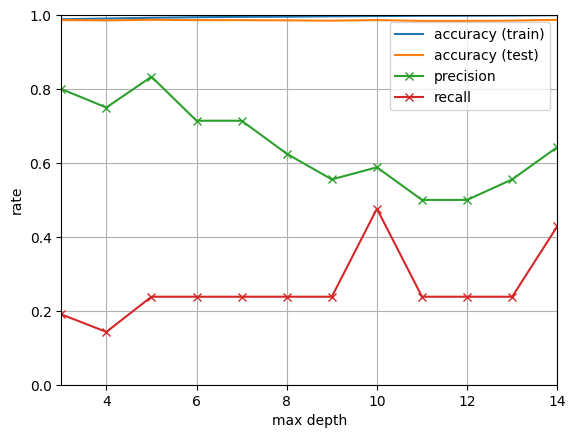

In [32]:
def do_decision_tree (max_depth, X_train, y_train, X_test, y_test, print_results = False):
    DT_model = DecisionTreeClassifier (random_state=2024, max_depth = max_depth)
    DT_model.fit (X_train, y_train)
    y_pred_train = DT_model.predict (X_train)
    accuracy_train = metrics.accuracy_score (y_train, y_pred_train)
    y_pred = DT_model.predict (X_test)
    accuracy_test = metrics.accuracy_score (y_test, y_pred)
    precision_test = metrics.precision_score (y_test, y_pred)
    recall_test = metrics.recall_score (y_test, y_pred)

    if print_results:
        print (f"  accuracy (training set) : " \
           + f"{metrics.accuracy_score (y_train, y_pred_train):5.3f}")
        print ()
        show_confusion_matrix_extended (y_test, y_pred, labels = ["non hab", "hab"])

    return max_depth, accuracy_train, accuracy_test, precision_test, recall_test

print (" depth  acc-tra  acc-tes  pre-tes  rec-tes")
print (" -----  -------  -------  -------  -------")
list_max_depth = range (14, 2, -1) 
list_of_results = []
for max_depth in list_max_depth:
    results = do_decision_tree (max_depth, X_train, y_train, X_test, y_test)
    list_of_results.append (results)
    print (f"  {max_depth:2d}   ", end = "")
    for i in range (len (results) - 1):
        print (f"  {results [i+1]:6.4f} ", end = "")
    print ()
print (" -----------------------------------------")

list_of_results = np.array (list_of_results)

plt.plot (list_of_results [:,0], list_of_results [:,1], label = "accuracy (train)")
plt.plot (list_of_results [:,0], list_of_results [:,2], label = "accuracy (test)")
plt.plot (list_of_results [:,0], list_of_results [:,3], 'x-', label = "precision")
plt.plot (list_of_results [:,0], list_of_results [:,4], 'x-', label = "recall")
plt.xlabel ("max depth")
plt.ylabel ("rate")
plt.ylim ([0.0, 1.0])
plt.xlim ([3.0,14.0])
plt.legend ()
plt.grid ()
plt.show ()

#### Welche Probleme können auftreten?

**Große Verzerrung**: 
Eine große Verzerrung, also ein große Diskrepanz zwischen vorhergesagten und tatsächlichem Ergebnis,
 deutet darauf hin, dass das Modell zu einfach ist (untertrainiert).
 Dies kann beispielsweise geschehen, wenn
 - ein lineares Modell für nicht-lineare Daten angewendet wird,
 - zu wenige Daten einbezogen werden oder
 - wenn die berücksichtigten Daten nicht relevant sind.

 **Große Varianz**: 
 Eine große Varianz, also eine große Streuung deutet darauf hin, dass nur die Trainingsmenge
 gut abgebildet wird, die Testmenge jedoch nicht (übertrainiert). Die Generalisierung der
 Modellierung klappt nicht gut.
 DIes kann beispielsweise auftreten, wenn
 - einfache Dinge zu komplex modelliert werden, 
   wobei Ecken und Kanten der Daten und auch Ausreißer mit modelliert werden 
   (10 Datenpunkte, die einen linearen Zusammenhang zeigen, mit Hilfe eines Polynoms 9.ten Grades exakt interpolieren) oder
 - zu viele nicht relevante Daten mit berücksichtigt werden (Untergrund, *noise*)

Egal ob über- oder untertrainiert, die Ergebnisse auf der Testmenge nicht schlecht.
Wann ist ein geeignetes Maß an Training erreicht?
Dazu können die Differenzen zwischen den Kennzahlen der Trainingsmenge und der Testmenge
betrachtet werden.
- Ist die Verzerrung bei Trainings- und Testmenge groß, dann ist das Modell schlecht trainiert,
  es ist untertrainiert. 
- Ist der Unterschied zwischen den Kennzahlen der Trainingsmenge und der Testmenge groß,
  dann modelliert das Modell die Trainingsdaten gut, jedoch nicht die Testdaten,
  das  Modell ist übertrainiert. 

Mit der Analyse bezüglich große Verzerrung, große Varianz ist noch keine Verbesserung verbunden.
Es ist nur eine Analyse der Probleme.


### 4.2 Untersuchung der Algorithmen
Die Kennzahlen für die Betrachtung der gesamten Menge der habitablen Planeten sind nicht so gut.
Welche Ursachen kann dies haben?
Dazu wird eine Untersuchung mit Hilfe der Kreuzvalidierung durchgeführt.
Es werden dabei nicht nur die Kennzahl Trefferquote für die Testmenge,
sondern auch für die Trainingsmenge ausgegeben. 
Es wird mit einer Zerlegung in $k = 10$ Teilen gearbeitet.

In [33]:
# --- set parameters for all variants!
k_splits = 10
random_state = 2024

# --- routine to show distribution of data
def print_distribution (train, test, label):
    n_train_hab = np.sum (label [train])
    n_train_non = train.size - n_train_hab
    n_test_hab = np.sum (label [test])
    n_test_non = test.size - n_test_hab
    print (f" train: [{n_train_non:5.0f} - {n_train_hab:3.0f}]" + \
           f"   test: [{n_test_non:5.0f} - {n_test_hab:3.0f}]")

In [34]:
cv = KFold (shuffle = True, n_splits = k_splits, \
                random_state = random_state)

# -- show the distribution
for train, test in cv.split (hwc_features, hwc_label): 
    print_distribution (train, test, hwc_label)

# --- cross validation
scores = cross_validate (DT_model, hwc_features, hwc_label, cv = cv, \
                             scoring = 'recall', return_train_score = True)

print ("\nvalues for recall ")
print ("  test set     :", end = "")
for score in scores ['test_score']:
    print (f"  {score:6.4f}", end = "")
print ("")
print ("  training set :", end = "")
for score in scores ['train_score']:
    print (f"  {score:6.4f}", end = "")
print ("\n")

print (f"recall training set : {scores ['train_score'].mean ():5.3f} " \
       + f"+/- {scores ['train_score'].std () :5.3f}")

print (f"recall test set     : {scores ['test_score'].mean ():5.3f} " \
       + f"+/- {scores ['test_score'].std () :5.3f} \n")

# --- predict
y_pred = cross_val_predict (DT_model, hwc_features, hwc_label, cv = cv)

# --- display confusion matrix
show_confusion_matrix_extended (hwc_label, y_pred, labels = ["non hab", "hab"])

 train: [ 4756 -  59]   test: [  524 -  11]
 train: [ 4753 -  62]   test: [  527 -   8]
 train: [ 4748 -  67]   test: [  532 -   3]
 train: [ 4751 -  64]   test: [  529 -   6]
 train: [ 4754 -  61]   test: [  526 -   9]
 train: [ 4750 -  65]   test: [  530 -   5]
 train: [ 4749 -  66]   test: [  531 -   4]
 train: [ 4750 -  65]   test: [  530 -   5]
 train: [ 4754 -  61]   test: [  526 -   9]
 train: [ 4755 -  60]   test: [  525 -  10]

values for recall 
  test set     :  0.4545  0.5000  0.3333  0.8333  0.4444  0.8000  0.7500  0.4000  0.3333  0.4000
  training set :  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000

recall training set : 1.000 +/- 0.000
recall test set     : 0.525 +/- 0.184 

  Confusion Matrix       |     predicted label     |
                         | non hab    | hab        |
-------------------------+------------+------------+
              non hab    | TN=   5245 | FP=     35 |
  true label  -----------+------------+------------+
  

Da für den Entscheidungsbaum keine Restriktion in der Tiefe gegeben ist, 
ist das Ergebnis für die Trefferquote in der Trainingsmenge stets 100%.
Die Trefferquto in der Testmenge ist jedoch nur bei etwa 50%. 
Daher gibt es eine große Differenz zwischen den Kennzahlen zwischen Trainingsmenge und Testmenge.
Auf Grund der Standardabweichung ist der Unterschied signifikant.
Daher ist die Varianz hoch.

### 4.3 Lernkurve
Wie entwickeln sich die Kennzahlen, in Abhängigkeit der Größe der Trainingsmenge?
Dies ist eine wichtige Fragestellung.
Dazu wird eine **Lernkurve** (*learning curve*) erstellt.
Diese Lernkurve stellt grafisch dar, wie sich eine Kennzahl verändert,
wenn sich die Größe der Trainingsmenge ändern.

Mit `SHuffleSplit`wird die Aufteilung in Trainings- und Testmenge anhand von zufälligen Permutationen durchgeführt.

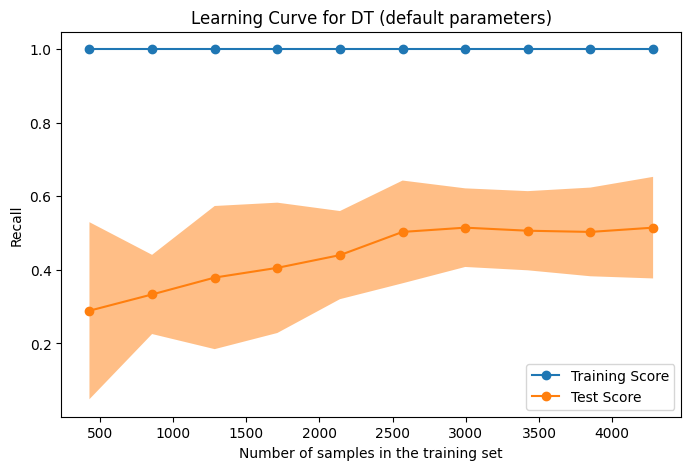

In [35]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharey=True)
common_params = {
    "X": hwc_features,
    "y": hwc_label,
    "train_sizes": np.linspace (0.1, 1.0, 10),
    "cv": ShuffleSplit (n_splits=10, test_size=0.2, random_state=2024),
    "scoring": "recall",
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Recall",
}

LearningCurveDisplay.from_estimator (DT_model, **common_params, ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend (handles[:2], ["Training Score", "Test Score"])
ax.set_title (f"Learning Curve for DT (default parameters)")
plt.show ()

In dem obigen Plot werden sind die Kennzahlen für die Testmenge und auch für die Trainingsmenge dargestellt.
Darher kann in dieser  Grafik sowohl die Verzerrung der Daten, als auch die Varianz betrachtet werden kann.
Daher kann auch abgeschätzt werden, ob mehr Daten hilfreich sind.

### 4.4 Verbesserungen
In den obigen Abschnitten sind einige Problempunkte aufgezeigt worden.
Es ergibt sich die Fragestellung, welche Möglichkeiten es gibt, die Ergebnisse zu verbessern.
DIesr Prozessschritt ist ein wichtiger Teil im Maschinellen Lernen.
Daher ist es ein iteratives Vorgehen, bis das Ergebnis zufriedenstellend ist.
Welche Möglichkeiten gint es?

#### 1 Anpassung der Hyperparameter
Die **Anpassung der Hyperparameter** (*hyperparameter tuning*) ist ein wichtige Vorgehensweise.
Die verschiedenen Modelle haben untershciedliche Hyperparameter.
Beim Modell *Entscheidungsbaum* (**DT**) ist ein wesentlicher Hyperparameter die Tiefe, bis zu der der Entscheidungsbaum erstellt wird.
Beim Modell *k-Nächster-Nachbarn* (**kNN**) ist die Anzahl der Nachbarn, die für den Vergleich herangezogen werden ein wesentlicher Hyperparameter.
Bei **kNN** kann jedoch statt der Anzahl der Nachbarn auch der Radius angegeben werden, in dem Nachbarn gesucht werden.
Es gibt weitere Hyperparameter für die Modelle, die in den jeweiligen Beschreibungen der Modelle nachgesehen werden können.

**Parameter / Hyperparameter**
Es ist wichtig zwischen Parameter und Hyperparameter zu unterscheiden.

Ein **Hyperparameter** (*hyperparameter*) ist eine Einstellung im Modell und somit eine Architekturfrage des Modells.
Ein Hyperparameter kann ein numerischer Wert sein (Tiefe beim Algorithmus DT) jedoch auch ein nicht-numerischer Wert
(typ vom Abstand bei kNN: Anzahl der Nachbarn oder Radius). 
Dabei kann es mehrere Hyperparameter geben, die in verschiedenen Variationen miteinander gemischt werden können.

Ein **Parameter** (*parameter*) ist ein numerischer Wert, der im Rahmen des Trainings gelernt wird.

Wenn aus Datenpunkten ein Polynom bestimmt werden soll, welches die Daten am besten nähert (das ist eine Regression, die später behandelt wird),
dann ist der Grad des Polynoms ein Hyperparameter.
Bei einem Neuronalen Netz (das auch später behandelt wird) die die Anzahl der verborgenen Schichten und die Anzahl der
Knoten in den jeweiligen Schichten Hyperparameter. Die Gewichte für die Verbindungen zwischen den Knoten sind die Parameter,
die beim Trainieren gelernt werden.

Auch die Optimierung der Hyperparameter kann wiederum ein Trainingsprozess sein.
Daher kann die Vorbereitung beim Maschinellen Lernen, also das Finden eines geeigneten Modells ein aufwändiger und
langwieriger Prozess sein. Ziel ist oftmals ein schnelles und zuverlässiges Modell zu finden. 
Zur Bedeutung von Hyperparametern, siehe auch [Pro2019].

#### 2 Gestaltung und Auswahl von Eigenschaften
Die Eigenschaften der Daten sind die Basisbausteine für das Maschinelle Lernen.
Mit diesen Eigenschaften werden die Prozesse gestaltet.
Bei der **Gesatltung von Eigenschaften** (*feature engineering*) und der **Auswahl von Eigenschaften** (*feature selection*)
werden diese Daten betrachtet. Daher ist es auch wichtig, dass diejenigen, welche die Prozesse gesatlten auch gute
fachliche Kenntnisse bezüglich der Daten haben. 

Wenn die Gesamtübersicht der habitablen Planeten (siehe JN03a-DatenAufbereiten) betrachtet wird,
dann ist zu erkennen, dass die Daten  in der zwei-dimensionalen Grafik schräg verlaufen.
Beim Algorithmus **DT** wird jedoch immer entlang der vorhandenen Achsen geteilt,
also horizontale oder vertikale Schnitte. 
Durch die Kombination von vorhandenen Eigenschaften kann eine neue Eigenschaft begildet werden.
Dieser Vorgang wird **Gesatltung von Eigenschaften** (*feature engineering*) genannt.
Bei den habitablen Planeten kann eine Kombination aus den Daten *Masse des Elternplaneten* und *Dauer eines Umlaufes*
eine neue Eigenschaft erstellen.
Diese neue Eigenschaft ist für den Algorithmus **DT** eventuell geeigneter gute Entscheidung beim Splitten zu treffen.
Personen mit einer guten fachlichen Expertise können solche Gestaltungen teilweise bereits im Vorfeld treffen
und somit den Prozess beschleunigen.

Ebenso ist es möglich Daten wegzulassen. 
Bei der **Auswahl von Eigenschaften** (*feature selection*) werde also bewusst Daten weggelassen und damit die Problemgröße reduziert.
Auch hier ist wieder die Herausforderung, die Daten zu kennen, also fachliches Wissen zu haben, um zu erkennen, welche Daten nicht relevant
sind, welche Daten somit ohne Probleme weggelassen werden können.

Dies ist ein Teil des ersten Prozessschrittes *vorbereiten / prepare*

#### 3 Algorithmus wechseln
Bei der Aufgabenstellung der habitablen Planeten wurden zwei verschiedene Algorithmen vorgestellt: **DT** und **kNN**.
Diese beiden Algorithmen brachten unterschiedliche Ergebnisse. 
Es gibt noch viele, sehr viele Algorithmen. 
Daher kann es eine Möglichkeit sein, den **Algortihmus wechseln** (*switching algorithm*)
Dann können die Ergebnisse der verschiedenen Algorithmen verglichen werden.
Dieser Teil gehört (zusammen mit der Anpassung der Hyperparameter) zum zweiten Prozessschritt (*auswählen / select*).
Hierzu ist es erforderlich, verschiedene Algorithmen und insbesondere auch die Einstellmöglichkeiten kennen zu lernen.

#### 4 Lernmenge neu zusamenstellen
Wenn die Lernmenge sehr unausgeglichen ist, wie beispielsweise bei den habitablen Planeten,
dann kann es hilfreich sein, die Lernmenge neu aufzustellen.
Aus der gegebenen Lernmenge werde mit einem Zufallsprozess Daten entnommen und in eine neue Lernmenge eingefügt.
Dabei ist die Wahrscheinlichkeit für die Auswahl eines Elementes mit der seltenen Eigenschaft höher als
für die Auswahl eine sElementes, welches häufig vorkommt.
Dieses Vorgehen wird **Resampling** (*resamplig*) genannt.

### 5 Mehr Daten
Eine wichtige Möglichkeit ist auch. mehr Daten zu verwenden.
Dies ist jedoch nicht immer einafch machbar.
Bei den habitablen Planeten können nicht einfach tausende von neuen Daten erzeugt werden.
Bei physikalischen Experimenten, wie am LHC, können jedoch durch weitere Versuchsläufe zusätzliche Daten erzeugt werden.
Daher ist es auch immer eine Frage, ob und wie neue, zusätzliche Daten erzeugt werden können.
Damit sielen auch Zeit- und Kostenfragen eine bedeutende Rolle (können die neuen Daten schnell genug gewonnen werden,
sind die Kosten für die Gewinnung der Daten vertretbar).

### Literatur ###
- [Acq2023] Viviana Acquaviva; Machine Learning for Physics and Astronomy; Princeton University Press; 2023
- [Faw2006] Tom Fawett; „An Introduction to ROC analysis“. In: Pattern Recognition Letters 27.8 (2006), S. 861–874.
- [Pro2019] Philipp Probst, Anne-Laure Boulesteix and Bernd Bischl; Tunability: Importance of Hyperparameters of Machine
 Learning Algorithms; Journal of Machine Learning Research , 20 (53): 1 - 32; 2019
- [Van2024] Jake VanderPlas; Handbuch Data Science mit Python; O'Reilly; 2024; (Übersetzung der 2. Auflage von *Python Data Science Handbook*)
